In [1]:
import scipy.stats as stats
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [3]:
a = stats.bernoulli.rvs(0.1, size=100)

In [4]:
a

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
b = rd.binomial(10, 0.5, size=1000)

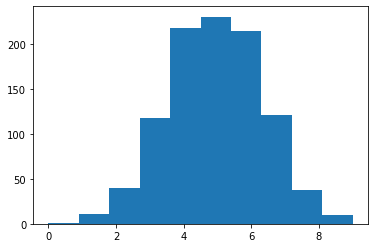

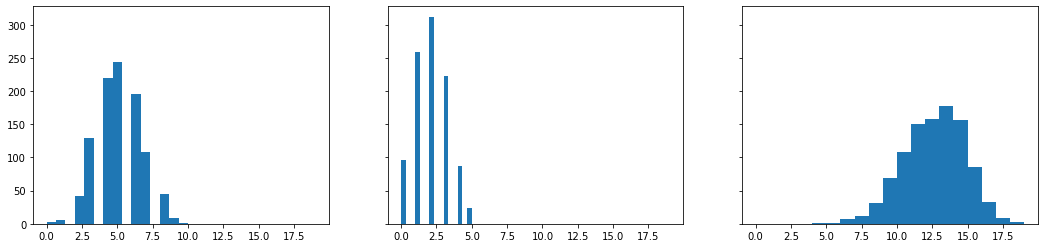

In [6]:
plt.hist(b, 10)
p = [0.5, 0.2, 0.6]
M = [10, 10, 20]
fig, ax = plt.subplots(1, 3, figsize=(18, 4), sharex=True, sharey=True)
for i in range(3):
    x = rd.binomial(M[i], p[i], size=1000)
    ax[i].hist(x, 15)

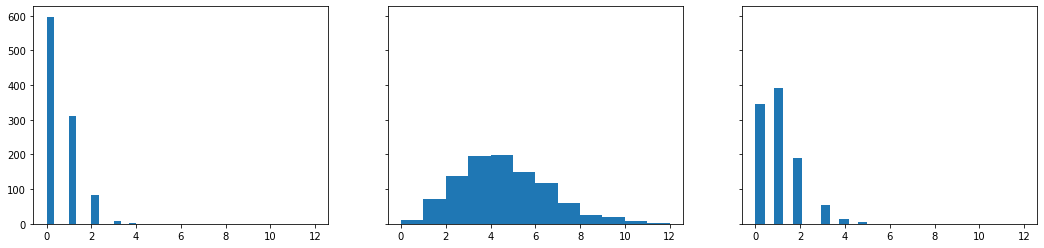

In [7]:
a = [0.5, 4.0, 1.0]
fig, ax = plt.subplots(1, 3, figsize=(18, 4), sharex=True, sharey=True)

for i in range(3):
    x = rd.poisson(a[i], 1000)
    ax[i].hist(x, 12)


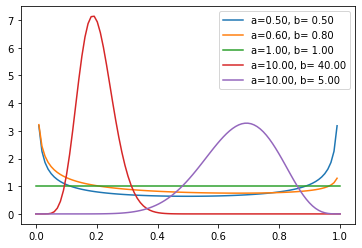

In [8]:
a = [(0.5, 0.5), (0.6, 0.8), (1.0, 1.0), (10.0, 40.0), (10.0, 5.0)]
x = np.linspace(0.0, 1.0, 100)
for i in range(5):
    y = stats.beta.pdf(x, a[i][0], a[i][1])
    plt.plot(x, y, label="a=%.2f, b= %.2f" % (a[i][0], a[i][1]))
plt.legend(loc="upper right")

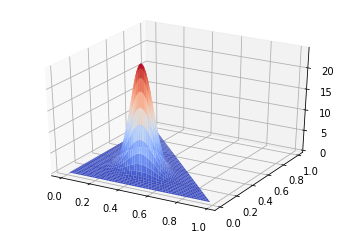

In [9]:

xx = np.array([[0.01 * a * 0.01 *(100 - b) for a in range(1, 100)] for b in range(1, 100)])
yy = np.array([[0.01*b]*99 for b in range(1, 100)])
fig = plt.figure()
ax = fig.gca(projection="3d")
a = [10, 0.5, 1.0]
di = stats.dirichlet([a[0], a[0], a[0]])
z = di.pdf([xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
ax.plot_surface(xx, yy, z, cmap=cm.coolwarm)
plt.show()

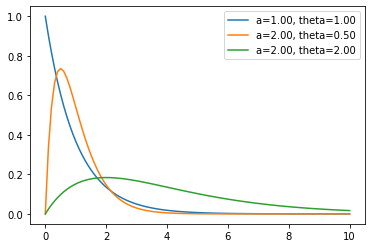

In [10]:
par = [(1.0, 1.0), (2.0, 0.5), (2.0, 2.0)]
fig = plt.figure(figsize=(6,4))
x = np.linspace(0, 10, 100)
for i in range(3):
    y = stats.gamma(a=par[i][0], scale=par[i][1]).pdf(x)
    plt.plot(x, y, label="a=%.2f, theta=%.2f" % (par[i][0], par[i][1]))
plt.legend(loc="upper right")

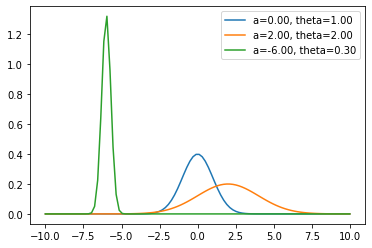

In [11]:
par = [(0.0, 1.0), (2.0, 2.0), (-6.0, 0.3)]
fig = plt.figure(figsize=(6,4))
x = np.linspace(-10, 10, 100)
for i in range(3):
    y = stats.norm(par[i][0], par[i][1]).pdf(x)
    plt.plot(x, y, label="a=%.2f, theta=%.2f" % (par[i][0], par[i][1]))
plt.legend(loc="upper right")

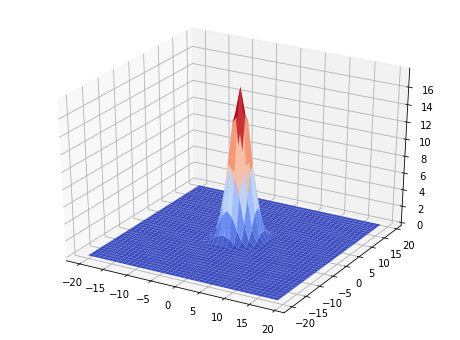

In [5]:
x = y = np.arange(-20, 20, 1)
xx, yy = np.meshgrid(x ,y)
z = np.c_[xx.ravel(), yy.ravel()]
def multigaussian(x, mu, sigma):
    det = np.linalg.det(sigma)
    inv = np.linalg.inv(sigma)
    n = x.ndim
    return np.exp(-np.diag((x - mu) @ inv @ (x - mu).T)/ 2.0) * np.sqrt((2 * np.pi)**n  * det)
m = np.array([0, 0])
s = np.array([[3, 1] , [1, 3]])
zz = multigaussian(z, m, s)
zz = zz.reshape(xx.shape)

fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection="3d")
ax.plot_surface(xx, yy, zz,cmap=cm.coolwarm)
plt.show()

In [3]:
a = np.array([[3, 2], [3, 2]])
print(np.linalg.eig(a))

(array([5., 0.]), array([[ 0.70710678, -0.5547002 ],
       [ 0.70710678,  0.83205029]]))
